<a href="https://colab.research.google.com/github/camilalarrosa/ML_CO2emissions_predictions/blob/main/ML_CO2emissions_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [47]:
data = pd.read_csv('/content/sample_data/FuelConsumptionCo2.csv')

# Data exploration

In [26]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [42]:
data.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6,AS6,X,14.9,10.2,12.8,22,294


In [109]:
data.shape

(1067, 13)

In [28]:
data.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [29]:
data.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [30]:
# checking for null fields
data.isnull().sum()

# There are no null fields

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [31]:
# checking for duplicate data
data.duplicated().sum()

# no duplicate data

0

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


Transforming categorical attributes into numeric

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
label_encoder_style = LabelEncoder()

In [49]:
data['VEHICLECLASS'] = label_encoder_style.fit_transform(data['VEHICLECLASS'])
data['VEHICLECLASS']

0        0
1        0
2        0
3       11
4       11
        ..
1062    11
1063    11
1064    11
1065    11
1066    12
Name: VEHICLECLASS, Length: 1067, dtype: int64

In [50]:
data['MAKE'] = label_encoder_style.fit_transform(data['MAKE'])
data['MAKE']

0        0
1        0
2        0
3        0
4        0
        ..
1062    38
1063    38
1064    38
1065    38
1066    38
Name: MAKE, Length: 1067, dtype: int64

In [202]:
data['MODEL'] = label_encoder_style.fit_transform(data['MODEL'])
data['MODEL']

0       329
1       329
2       330
3       389
4       483
       ... 
1062    624
1063    624
1064    625
1065    625
1066    626
Name: MODEL, Length: 1067, dtype: int64

In [203]:
# Ordering the data from lowest to highest CO2 emission, 
# to try to find some relationship between this parameter and the variation of the others

data.groupby( by=['CO2EMISSIONS'] ).sum()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
CO2EMISSIONS,,,,,,,,,,
108,2014,36,439,0,1.5,4,4.6,4.9,4.7,60
110,4028,49,526,4,3.8,8,9.4,9.8,9.6,118
124,2014,37,345,0,1.4,4,5.6,5.2,5.4,52
126,4028,47,736,10,3.8,8,10.6,11.5,11.0,102
129,2014,21,193,0,1.8,4,5.5,5.8,5.6,50
...,...,...,...,...,...,...,...,...,...,...
421,4028,30,335,28,11.9,20,43.4,28.4,36.6,30
432,4028,19,787,30,12.0,16,43.8,30.0,37.6,30
435,4028,19,789,30,12.0,16,44.2,30.0,37.8,30


# Checking the correlation between CO2 and the other parameters

In [204]:
# Checking Pearson's Correlation - linear relationship
data.corr()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAKE,NaN,1.000000,0.039068,0.005853,-0.166416,-0.203427,-0.246247,-0.174665,-0.222273,0.226347,-0.186504
MODEL,NaN,0.039068,1.000000,0.244648,0.096304,0.080010,0.147394,0.182009,0.161373,-0.148806,0.155492
VEHICLECLASS,NaN,0.005853,0.244648,1.000000,0.240529,0.208528,0.354363,0.430074,0.384678,-0.354073,0.388468
ENGINESIZE,NaN,-0.166416,0.096304,0.240529,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,-0.203427,0.080010,0.208528,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,-0.246247,0.147394,0.354363,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,-0.174665,0.182009,0.430074,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,-0.222273,0.161373,0.384678,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,0.226347,-0.148806,-0.354073,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394


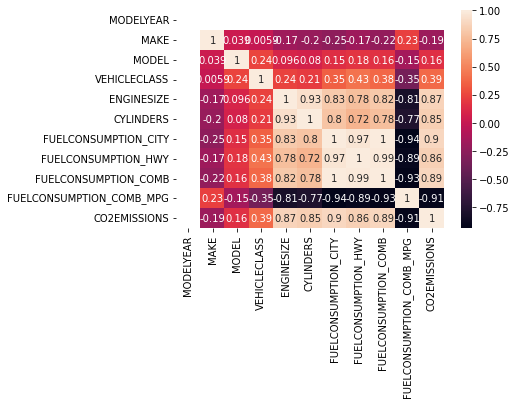

In [205]:
# Viewing the Pearson's Correlation
sns.heatmap(data.corr(), annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


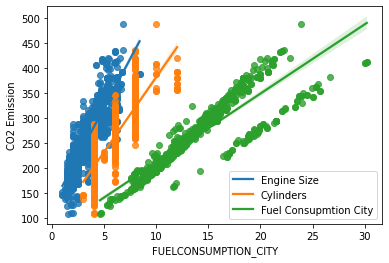

In [56]:
# Creating a scatterplot with linear fit for the highest correlation parameters (>0.8).

# OBS: they were separated in 2 graphs for better visualization.

sns.regplot(data.ENGINESIZE, data.CO2EMISSIONS)
sns.regplot(data.CYLINDERS, data.CO2EMISSIONS)
sns.regplot(data.FUELCONSUMPTION_CITY, data.CO2EMISSIONS)
plt.ylabel('CO2 Emission')
plt.legend(('Engine Size', 'Cylinders', 'Fuel Consupmtion City'))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


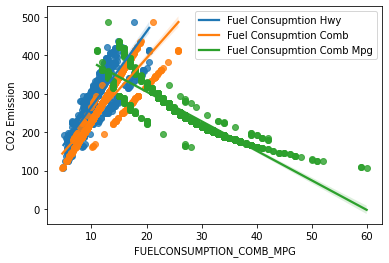

In [57]:
sns.regplot(data.FUELCONSUMPTION_HWY, data.CO2EMISSIONS)
sns.regplot(data.FUELCONSUMPTION_COMB, data.CO2EMISSIONS)
sns.regplot(data.FUELCONSUMPTION_COMB_MPG, data.CO2EMISSIONS)
plt.ylabel('CO2 Emission')
plt.legend(('Engine Size', 'Cylinders', 'Fuel Consupmtion City', 'Fuel Consupmtion Hwy', 'Fuel Consupmtion Comb', 'Fuel Consupmtion Comb Mpg'))
plt.show()

# We can see that the data have a good linear fit, even by the correlation coefficients. 
# But also, that in some cases non-linear fits would be better modeled.

In [208]:
# Checking the Spearman Correlation - no linear assumptions
data.corr('spearman')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MAKE,NaN,1.000000,0.058137,0.025297,-0.157698,-0.203642,-0.230768,-0.138933,-0.199743,0.204306,-0.174444
MODEL,NaN,0.058137,1.000000,0.230920,0.078100,0.072769,0.143401,0.199919,0.163787,-0.163259,0.163900
VEHICLECLASS,NaN,0.025297,0.230920,1.000000,0.280839,0.272521,0.344440,0.426469,0.374635,-0.373861,0.393557
ENGINESIZE,NaN,-0.157698,0.078100,0.280839,1.000000,0.941816,0.885117,0.849250,0.879171,-0.878453,0.889973
CYLINDERS,NaN,-0.203642,0.072769,0.272521,0.941816,1.000000,0.864859,0.818107,0.854421,-0.854305,0.875330
FUELCONSUMPTION_CITY,NaN,-0.230768,0.143401,0.344440,0.885117,0.864859,1.000000,0.965144,0.995949,-0.995310,0.949859
FUELCONSUMPTION_HWY,NaN,-0.138933,0.199919,0.426469,0.849250,0.818107,0.965144,1.000000,0.984117,-0.983202,0.936560
FUELCONSUMPTION_COMB,NaN,-0.199743,0.163787,0.374635,0.879171,0.854421,0.995949,0.984117,1.000000,-0.999126,0.953496
FUELCONSUMPTION_COMB_MPG,NaN,0.204306,-0.163259,-0.373861,-0.878453,-0.854305,-0.995310,-0.983202,-0.999126,1.000000,-0.952809


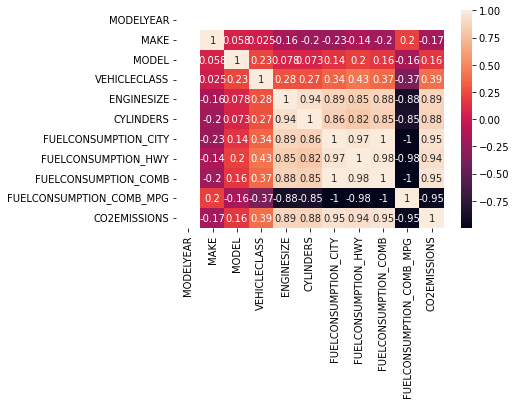

In [209]:
# Viewing the Spearman Correlation - no linear assumptions
sns.heatmap( data.corr( 'spearman' ), annot=True )

# We can see a better correlation of the parameters in relation to CO2 emissions through the Spearman Correlation

# Creating a smaller dataframe

Only with the best correlation parameters (>= 0.88)

In [151]:
new_df = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']]

In [152]:
new_df.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [153]:
new_df.shape

(1067, 7)

# Division between predictors (x) and class (y)

In [154]:
x_df = new_df.iloc[:,0:6].values
x_df

array([[ 2. ,  4. ,  9.9,  6.7,  8.5, 33. ],
       [ 2.4,  4. , 11.2,  7.7,  9.6, 29. ],
       [ 1.5,  4. ,  6. ,  5.8,  5.9, 48. ],
       ...,
       [ 3. ,  6. , 13.4,  9.8, 11.8, 24. ],
       [ 3.2,  6. , 12.9,  9.3, 11.3, 25. ],
       [ 3.2,  6. , 14.9, 10.2, 12.8, 22. ]])

In [155]:
x_df.shape

(1067, 6)

In [156]:
y_df = new_df.iloc[:,6].values
y_df

array([196, 221, 136, ..., 271, 260, 294])

In [157]:
y_df.shape

(1067,)

# Escalation of values

In [158]:
# Scaling the predictor variables
from sklearn.preprocessing import StandardScaler
scaler_data = StandardScaler()
x_df = scaler_data.fit_transform(x_df)

In [159]:
x_df

array([[-0.9512918 , -0.99896853, -0.82855772, -0.99334135, -0.88430407,
         0.87855306],
       [-0.66865251, -0.99896853, -0.5114328 , -0.63532912, -0.5685715 ,
         0.34273362],
       [-1.30459092, -0.99896853, -1.77993246, -1.31555236, -1.63058106,
         2.88787597],
       ...,
       [-0.24469358,  0.11424235,  0.02524013,  0.11649658,  0.06289365,
        -0.32704069],
       [-0.10337393,  0.11424235, -0.09673099, -0.06250954, -0.08062116,
        -0.19308583],
       [-0.10337393,  0.11424235,  0.3911535 ,  0.25970147,  0.34992326,
        -0.59495041]])

# Splitting the database into training and testing

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
x_df_training, x_df_testing, y_df_training, y_df_testing = train_test_split(x_df, y_df, test_size = 0.2, random_state = 0)

In [162]:
x_df_training.shape , y_df_training.shape

((853, 6), (853,))

In [163]:
x_df_testing.shape , y_df_testing.shape

((214, 6), (214,))

# Polynomial regression

In [189]:
# Creating a polynomial regression model with the training dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
x_df_training_poly = poly.fit_transform(x_df_training)
x_df_testing_poly = poly.transform(x_df_testing)

In [190]:
x_df_training_poly.shape, x_df_testing_poly.shape

((853, 28), (214, 28))

In [191]:
# algorithm training
regressor_poly = LinearRegression()
regressor_poly.fit(x_df_training_poly, y_df_training)

LinearRegression()

In [212]:
# b0
regressor_poly.intercept_

278.88120284043606

In [213]:
# b(n) for each attribute x(n)
regressor_poly.coef_

array([ 3.84928158e-09,  4.03910661e+00,  1.60081960e+01, -3.32816539e+01,
       -3.22329000e+00,  1.37908561e+02,  5.02563553e+01,  1.35130844e+01,
       -2.56106428e+01,  1.47709073e+02,  1.06019515e+02, -2.29160041e+02,
        1.80064154e+01, -1.68451741e+00, -3.10403477e+02, -1.87705560e+02,
        5.19741257e+02, -1.31308360e+01, -3.95769499e+03, -4.86816434e+03,
        1.27548559e+04, -1.33172562e+02, -1.40021763e+03,  7.57639460e+03,
       -1.71843169e+02, -1.00913036e+04,  4.07904389e+02,  3.99401573e+01])

In [193]:
# Model-generated predictions from the test dataset
predictions = regressor_poly.predict(x_df_testing_poly)
predictions

array([365.63145125, 209.38164229, 226.35152932, 219.42125884,
       177.02677686, 292.49147418, 214.77944841, 281.79262873,
       204.34895458, 325.35223648, 285.15421368, 393.89572744,
       194.26921902, 278.49244329, 191.39654969, 266.62694679,
       349.34962517, 222.61091793, 254.62571647, 344.42794693,
       196.42459605, 186.42292719, 252.05934831, 240.28600162,
       135.04390236, 280.9789708 , 271.92401006, 343.99434843,
       241.91226604, 187.66227612, 346.28841296, 227.45542433,
       285.42894259, 246.73040287, 196.42459605, 197.97150711,
       290.1242856 , 218.90060784, 232.40336953, 240.30911083,
       188.87216616, 177.75168792, 208.82519607, 165.49596144,
       300.34342917, 201.90343488, 235.00658001, 177.58384702,
       363.11781101, 367.60580925, 316.84695069, 276.98304667,
       277.92301827,  94.58403299, 225.71478504, 177.58384702,
       284.33911381, 150.43827643, 260.56700097, 209.86760177,
       210.95153327, 211.43094695, 221.33090441, 343.99

In [211]:
# Real answers
y_df_testing

array([356, 209, 230, 212, 168, 292, 212, 276, 202, 334, 313, 437, 224,
       281, 177, 260, 414, 223, 251, 359, 191, 189, 244, 242, 131, 283,
       274, 294, 246, 110, 359, 239, 229, 237, 191, 196, 294, 221, 237,
       237, 184, 184, 202, 194, 297, 198, 260, 179, 344, 359, 338, 288,
       290, 129, 230, 179, 283, 159, 258, 209, 207, 205, 225, 294, 262,
       299, 354, 230, 207, 124, 304, 189, 354, 270, 338, 216, 283, 179,
       235, 166, 186, 253, 161, 334, 407, 246, 191, 172, 290, 258, 262,
       209, 283, 342, 356, 368, 168, 221, 368, 262, 182, 320, 126, 166,
       202, 196, 200, 288, 191, 259, 214, 228, 269, 317, 327, 294, 292,
       244, 361, 200, 258, 191, 382, 147, 179, 310, 229, 237, 292, 264,
       230, 294, 184, 136, 344, 373, 283, 110, 198, 232, 262, 191, 342,
       368, 189, 175, 285, 345, 301, 138, 179, 251, 161, 235, 310, 242,
       292, 221, 324, 235, 177, 209, 177, 202, 242, 205, 264, 184, 400,
       334, 260, 285, 235, 301, 281, 276, 265, 242, 184, 345, 29

# Evaluating the model

In [210]:
# Checking the R-square 
regressor_poly.score(x_df_testing_poly, y_df_testing)


# Model prediction ability = 91.84%. That is, almost 92% of the data variability can be explained by the generated model.

# For prediction purposes, minimums of 70% are suggested (PULIDO et al., 2012).

0.9184210829335036

In [194]:
# Checking the mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_df_testing, predictions)

# MAE = 10.87

# The mean absolute error of a model with respect to a test set is the mean of the absolute 
# values of the individual prediction errors on over all instances in the test set.

10.872742175595155